In [0]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Question 2

In [0]:
x=np.linspace(-6,6,10000)
#op=-np.abs(x)-np.log(2)+(np.abs(x-1)/2)+np.log((2*np.exp(-0.5))+(2*np.exp(0.5))) 
a1=0
b1=1
a2=1
b2=2

In [0]:
op_log= (np.abs(x-a2)/b2)-(np.abs(x-a1)/b1) + np.log( b2/b1 )

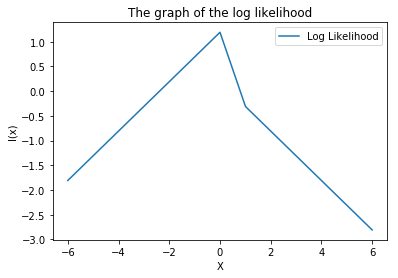

In [0]:
plt.plot(x,op_log,label='Log Likelihood')
plt.title('The graph of the log likelihood')
plt.xlabel('X')
plt.ylabel('l(x)')
plt.legend(loc='best')

## Question 4

In [0]:
x=np.linspace(-5,5,10000)
op1_prior=(1/np.sqrt(2*np.pi))*np.exp(-(x**2)/2)
op2_prior=(1/np.sqrt(4*np.pi))*np.exp(-((x-1)**2)/4)
x1=0.840188
y=(1/np.sqrt(2*np.pi))*np.exp(-(x1**2)/2)

px=(op1_prior+op2_prior)/2

op1_pos=op1_prior/(2*px)
op2_pos=op2_prior/(2*px)

In [0]:
#x1=-2.840188
#op1_prior1=(1/np.sqrt(2*np.pi))*np.exp(-(x1**2)/2)
#op1_prior1

In [0]:
x1=[0.840188]*10000
x2=[-2.840188]*10000

In [0]:
op_check1=np.linspace(0,0.2802995374870841,10000)
op_check2=np.linspace(0,0.007067330364507431,10000)

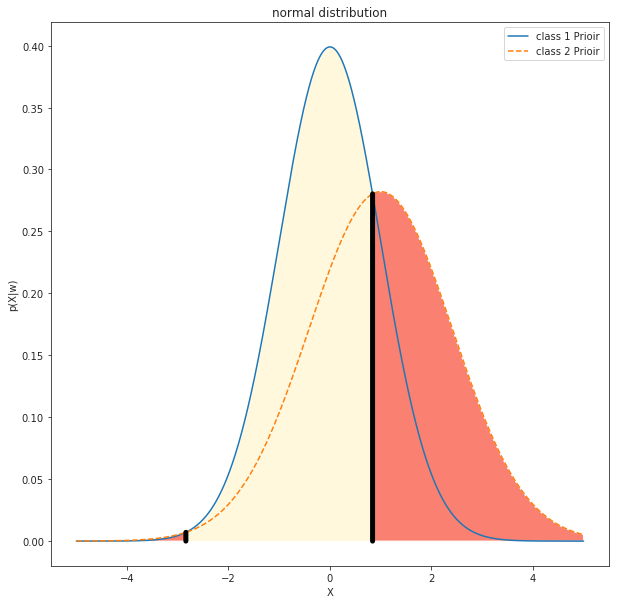

In [0]:
plt.figure(figsize=(10,10))
sns.set_style("ticks")
plt.plot(x, op1_prior, label='class 1 Prioir')
plt.plot(x, op2_prior, label='class 2 Prioir',linestyle='--')

plt.plot(x1,op_check1,'black',linewidth=5)
plt.plot(x2,op_check2,'black',linewidth=5)

plt.fill_between(x,op1_prior,0,where=(x<=0.840188)&(x>=-2.840188) ,facecolor='cornsilk', interpolate=True)
plt.fill_between(x,0,op2_prior,where=(x>=0.840188)|(x<-2.840188),facecolor='salmon', interpolate=True)
#plt.fill_between(x,op1_prior,op2_prior,where=op1_prior==op2_prior,facecolor='blue', interpolate=True)


plt.title('normal distribution')
plt.xlabel('X')
plt.ylabel('p(X|w)')
plt.legend(loc='best')

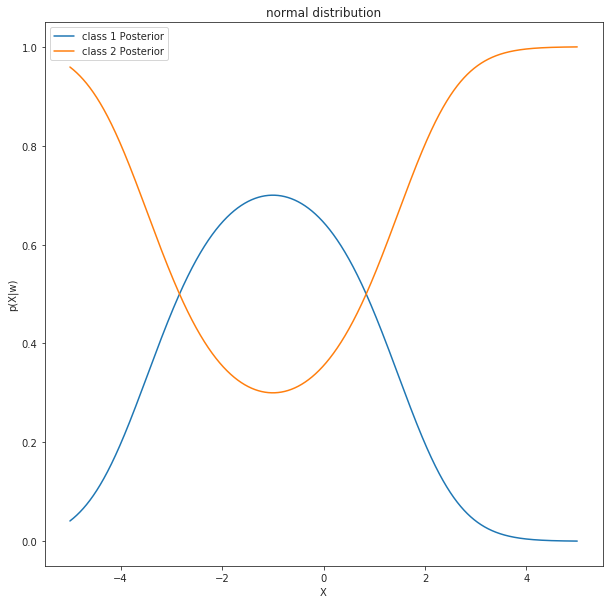

In [0]:
plt.figure(figsize=(10,10))
sns.set_style("ticks")
#sns.lineplot(x=x, y=op1_prior, label='class 1 Prioir')
#sns.lineplot(x=x, y=op2_prior, label='class 2 Prioir')
sns.lineplot(x=x, y=op1_pos, label='class 1 Posterior')
sns.lineplot(x=x, y=op2_pos, label='class 2 Posterior')




plt.title('normal distribution')
plt.xlabel('X')
plt.ylabel('p(X|w)')
plt.legend(loc='best')

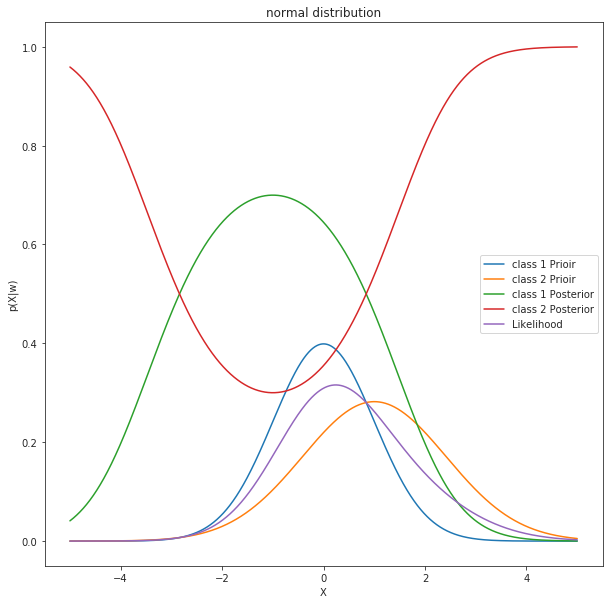

In [0]:
plt.figure(figsize=(10,10))
sns.set_style("ticks")
sns.lineplot(x=x, y=op1_prior, label='class 1 Prioir')
sns.lineplot(x=x, y=op2_prior, label='class 2 Prioir')
sns.lineplot(x=x, y=op1_pos, label='class 1 Posterior')
sns.lineplot(x=x, y=op2_pos, label='class 2 Posterior')
sns.lineplot(x=x, y=px, label='Likelihood')




plt.title('normal distribution')
plt.xlabel('X')
plt.ylabel('p(X|w)')
plt.legend(loc='best')

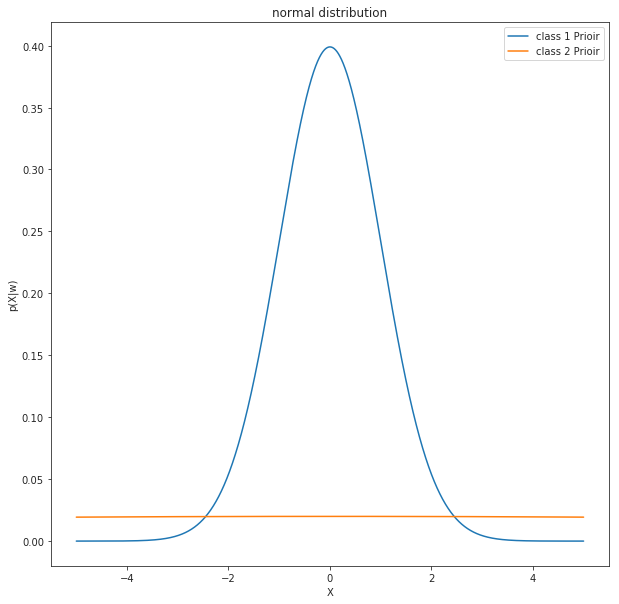

In [0]:
plt.figure(figsize=(10,10))
x=np.linspace(-5,5,10000)
op1_prior=(1/np.sqrt(2*np.pi))*np.exp(-(x**2)/2)
op3=(1/(np.sqrt(2*np.pi)*20))*np.exp(-((x)**2)/800)
sns.set_style("ticks")
sns.lineplot(x=x, y=op1_prior, label='class 1 Prioir')
sns.lineplot(x=x, y=op3, label='class 2 Prioir')
#sns.lineplot(x=x, y=(op1*0.5), label='class 1 Posterior')
#sns.lineplot(x=x, y=(op3*0.5), label='class 2 Posterior')




plt.title('normal distribution')
plt.xlabel('X')
plt.ylabel('p(X|w)')
plt.legend(loc='best')

# Question 5 can be calculated usink Cholesky decomposition

In [0]:
N=2 # number of dimensions, we consider 2 so that we can plot it
n=10000 # numer os samples to be takes
mu=np.array([[0], [0]]) # we are taking Random variables with mean =0
sigma=np.array([[5,1], # we want sigma to be a symmetric identity matrix
       [1,5]])

In [0]:
mu.shape

(2, 1)

In [0]:
np.linalg.eigvals(sigma) # to check if sigma is positive definite

array([6., 4.])

In [0]:
C = np.linalg.cholesky(sigma) # performing Cholesky Decomposition

In [0]:
np.dot(C, np.transpose(C)) # Cross checking to see if L*L^T=Sigma

array([[5., 1.],
       [1., 5.]])

In [0]:
iidu = np.random.normal(loc=0, scale=1, size=N*n)# generating IID with mean =0 , sigma=1 and shape of N*n that is 2*1000

In [0]:
iidu=iidu.reshape(N,n)

In [0]:
x = mu + np.dot(C, iidu)

In [0]:
iidu.shape

(2, 10000)

Text(336.9714285714286, 0.5, 'P(x2)')

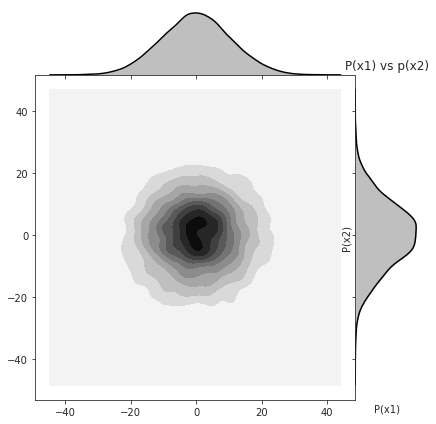

In [0]:
sns.jointplot(x=x[0],y=x[1], kind="kde", space=0, color='k')
plt.title('P(x1) vs p(x2)')
plt.xlabel('P(x1)')
plt.ylabel('P(x2)')

In [0]:
np.mean(x[0]),np.mean(x[1])

(0.002567148392185465, -0.014138586640335519)

## **Question 5**
## we will first derive the IID's that is z=N(0,I) and then linear transform them to x=n(mu,sigma) through the equation x=Az+b, where *b=mu *and *A=sqrt(Determinant(sigma))*

# 2nd method of calculation is what was derived in question 5.2 

In [0]:
det=np.linalg.det(sigma) # from question 5.2 we derived that A= np.sqrt(DET(sigma)) and b=mu . 

In [0]:
a=np.sqrt(det)

In [0]:
x = mu + (a* iidu) # we are perorming a linear trnsformation from z to X such that z=N(0,I) and x=N(mu,sigma), values of mu and sigma are provided by us.

Text(336.9714285714286, 0.5, 'P(x2)')

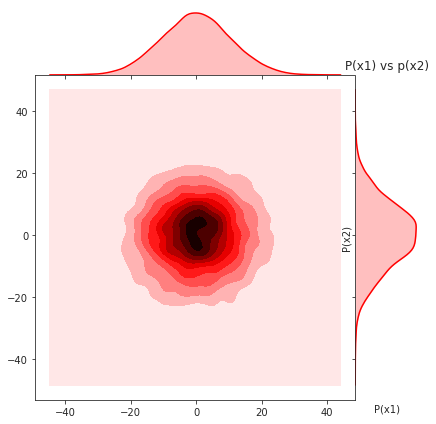

In [0]:
sns.jointplot(x=x[0],y=x[1], kind="kde", space=0, color='r')
plt.title('P(x1) vs p(x2)')
plt.xlabel('P(x1)')
plt.ylabel('P(x2)')

In [0]:
np.mean(x[0]),np.mean(x[1])

(0.005624340331452397, -0.032762904496211775)

## 3 dimensional 

In [0]:
N=3
n=10000
mu=np.array([[0], [0],[0]]) # we are taking Random variables with mean =0
sigma=np.array([[5,1,1], # we want sigma to be a symmetric identity matrix
                [1,5,1],

                [1,1,5]])

In [0]:
np.linalg.eigvals(sigma)

array([4., 7., 4.])

In [0]:
C = np.linalg.cholesky(sigma)

In [0]:
np.dot(C, np.transpose(C))

array([[5., 1., 1.],
       [1., 5., 1.],
       [1., 1., 5.]])

In [0]:
iidu = np.random.normal(loc=0, scale=1, size=N*n)
iidu= iidu.reshape(N,n)

In [0]:

x = mu + np.dot(C, iidu)

In [0]:
x.shape

(3, 10000)

In [0]:
x

array([[ -3.70222538,  -2.05195926,   1.58110648, ...,   4.57412238,
         11.23418217,  20.00233288],
       [ -5.58173436,  12.62501156,  -2.42392013, ...,   8.82285617,
         11.58144983,  -2.01934026],
       [ 10.4908379 ,  -8.36117523, -11.49850335, ...,   1.1857213 ,
         27.29398895,   6.29517832]])